# Creating Neural Networks with TensorFlow Core

- Use MNIST data to create simple neual networks
- Steps:
   1. Send input data to first hidden layer
   2. data is weighted and will undergo activatin function
   3. Data will be sent to output layer or another hidden layer
   4. From output layer, predicted output will be compared to actuall class
   5. Cost function will be used to how far off prediction is
   6. Optimizer will be used to minimize the cost
   7. Learning rate will be used to regulate how fast the cost is optimized
   
   
- Sending data through the network is considered the **feed forward** step
- The adjustment of weights backwards via optimization is call **back propagation**
- Can feed forward and backprop as many times as we want. These cycles are called **epochs**
- Can do this indefinitely though as it may cause **overfitting**
   

In [1]:
# Import data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Create and build model

# Define hidden layers and how many nodes
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

# Define number of classes
n_classes = 10

# Define batch size
batch_size = 100

#Create the placeholders
# x placeholders with a explicit shape (image size 28 x 28)
x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float')

In [3]:
#Define the neural network architecture

def neural_network_model(data):
    """
    Create the layers and their shapes
        - Input shape of first later will be [#features of data, nodes in first layer]
    """
    hidden_1_layer = {'weights': tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl1]))}
    
    hidden_2_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl2]))}
    
    hidden_3_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl3]))}
    
    output_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                      'biases': tf.Variable(tf.random_normal([n_classes]))}
    
    """
    ##################################################################################
    Create the flow of the net
    1. Perform the operation (W*x) + b = Z
    2. Perform relu(Z)
    """
    
    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)
    
    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    
    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']

    return output

In [4]:
# Create function to train the neural net
def train_neural_network(x):
    # Get predictions from neural_network_model function
    prediction = neural_network_model(x)
    
    # Compare predictions to labels and minimize cost with an optimizer
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    #Define number of epochs
    hm_epochs = 10
    cost_list=[]
    
    # Create the session
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        #Main run steps
        
        #For each epoch
        for epoch in range(hm_epochs):
            epoch_loss = 0
            
            # For each batch in our data
            for _ in range(int(mnist.train.num_examples/batch_size)):
                
                # Get X and y data
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                
                # Run the optimizer and cost against each batch
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                
                #Record the epoch loss
                epoch_loss += c
            
            cost_list.append(epoch_loss)
                
            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)
            
        # This will tell how many predictions we made that were perfect matches to their labels
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))
        
        # plot the cost
        plt.plot(np.squeeze(cost_list))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate = 0.001")
        plt.show()

Epoch 0 completed out of 10 loss: 2026817.2458496094
Epoch 1 completed out of 10 loss: 450513.67138671875
Epoch 2 completed out of 10 loss: 255637.7141418457
Epoch 3 completed out of 10 loss: 145585.5465439558
Epoch 4 completed out of 10 loss: 93767.2700886947
Epoch 5 completed out of 10 loss: 55569.162007033825
Epoch 6 completed out of 10 loss: 41975.5848928988
Epoch 7 completed out of 10 loss: 29984.755119260866
Epoch 8 completed out of 10 loss: 21626.386678027207
Epoch 9 completed out of 10 loss: 20663.87145368755
Accuracy: 0.9508


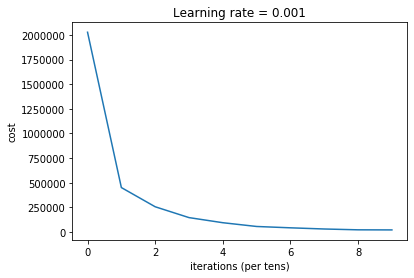

In [63]:
train_neural_network(x)

In [5]:
epoch_x, epoch_y = mnist.train.next_batch(batch_size)

In [6]:
epoch_x.shape

(100, 784)

In [6]:
neural_network_model(epoch_x)

<tf.Tensor 'add_3:0' shape=(100, 10) dtype=float32>